# Notebook Imports


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

plt.style.use("ggplot")

# Reading Data

In [19]:
df = pd.read_csv("data/cleaned_data.csv", index_col=0)
df = df.drop(columns=["title"])
df.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,T


# Splitting Dataset


In [20]:
encoding = {"E": 0, "ET": 1, "T": 2, "M": 3}
df.esrb_rating = df.esrb_rating.replace(encoding)

In [21]:
# train, val = train_test_split(df, test_size=0.2)
train = df

# Data Cleaning

In our data we have a lot of explanatory variables, some of which are possibly not highly correlated with the explanatory variable, and hence would end up causing bias in our bias
 

For this reason, we can remove the variables which are not correlated with the explanatory variable. 

The following cells lists down the variables sorted in ascending order of absolute value of correlation with esrb_rating

In [22]:
train.corr().esrb_rating.sort_values(key= lambda x: abs(x))

animated_blood             -0.003004
console                     0.008879
cartoon_violence           -0.013261
mild_suggestive_themes      0.017646
mild_violence              -0.019442
use_of_alcohol              0.033562
fantasy_violence           -0.036647
use_of_drugs_and_alcohol    0.037617
mature_humor                0.041279
crude_humor                 0.043724
mild_blood                  0.044577
mild_lyrics                -0.059579
alcohol_reference          -0.069486
mild_language              -0.076030
nudity                      0.085543
partial_nudity              0.120055
lyrics                      0.121068
drug_reference              0.122047
mild_cartoon_violence      -0.126603
violence                    0.146064
suggestive_themes           0.170760
sexual_content              0.185682
language                    0.200017
simulated_gambling          0.217016
strong_sexual_content       0.237007
intense_violence            0.247956
sexual_themes               0.267921
m

We remove the variables with abs(correlation) < 0.2

In [23]:
columns_to_drop = train.columns[
    train.corr().esrb_rating.sort_values(key=lambda x: abs(x)) < 0.05
]

train = train.drop(columns=columns_to_drop)
train.head()


,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,esrb_rating
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2


In [24]:
train.to_csv("data/training.csv")

# Data Visualization

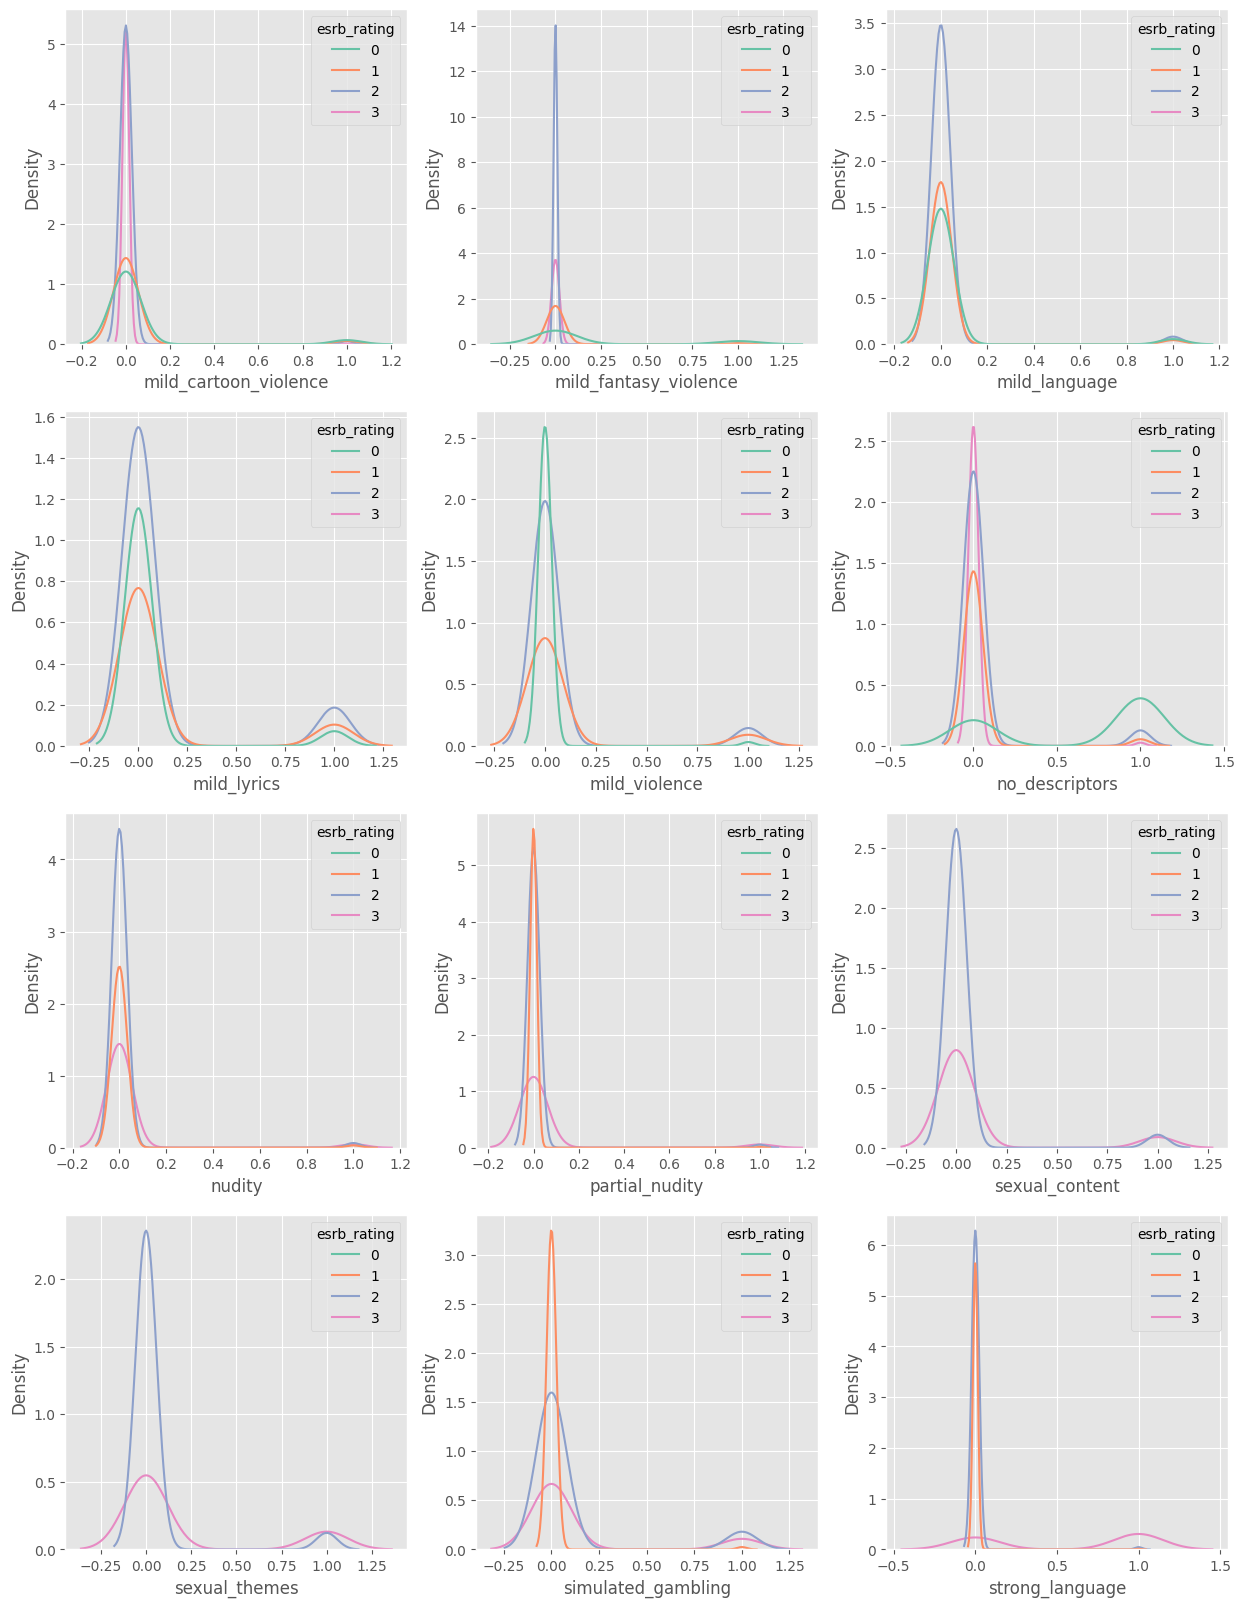

In [25]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

for ax, col in zip(axes, train.columns): 
    if col == "esrb_rating": 
        continue
    sns.kdeplot(data=train, x=col, hue="esrb_rating", ax=ax, palette="Set2", warn_singular=False)

plt.show()
    